## Project Summary 
-- Your goal ifor this project if to create an Artificial Neural Network that will use the OPEN for the  Capital Markets to predict the ClOSE for the 10 year Treasury (20 year tome frame)
-- Does these markes provide predictive insites on the the 10 Year Treasury Yield? 
-- Does using the 20 and 15 day moving average improve the model ? 


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as web

In [83]:
capital_tickers = ["^GSPC","^DJI", "^IXIC","^RUT"]
## "CL=F", "GC=F","SI=F","EURUSD=X"

In [84]:
capital_data = pd.DataFrame()

In [85]:
for t in capital_tickers:
    capital_data[t] = web.DataReader(t, data_source="yahoo", start = "2000-1-1")["Open"]

In [86]:
capital_data

,^GSPC,^DJI,^IXIC,^RUT
Date,,,,
2000-01-03,1469.250000,11501.849609,4186.189941,504.760010
2000-01-04,1455.219971,11349.750000,4020.000000,497.049988
2000-01-05,1399.420044,10989.370117,3854.350098,478.380005
2000-01-06,1402.109985,11113.370117,3834.439941,478.829987
2000-01-07,1403.449951,11247.059570,3711.090088,475.339996
...,...,...,...,...
2020-10-19,3493.659912,28633.550781,11732.339844,1636.839966
2020-10-20,3439.379883,28245.849609,11531.830078,1620.569946
2020-10-21,3439.909912,28270.660156,11530.389648,1618.339966


## Checking for missing Data
- Below we can see there is data missing from a few features so we ill need to take that into consideration when training our model

In [87]:
capital_data.isnull().sum()

^GSPC    0
^DJI     0
^IXIC    0
^RUT     1
dtype: int64

In [88]:
capital_data.corr()

,^GSPC,^DJI,^IXIC,^RUT
^GSPC,1.000000,0.991877,0.983038,0.956677
^DJI,0.991877,1.000000,0.967279,0.970509
^IXIC,0.983038,0.967279,1.000000,0.914378
^RUT,0.956677,0.970509,0.914378,1.000000


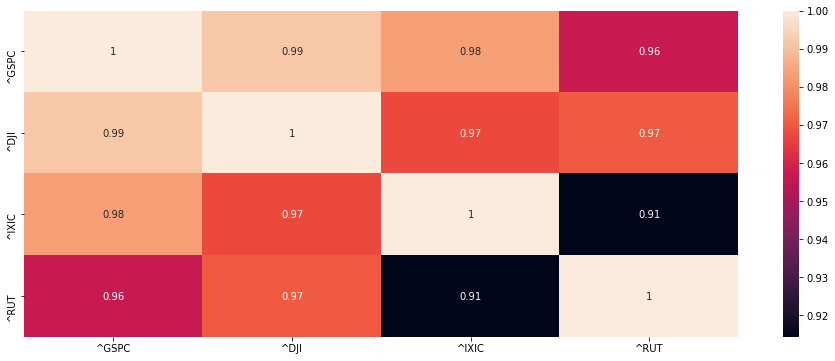

In [89]:
plt.figure(figsize=(16,6))
sns.heatmap(capital_data.corr(), annot=True)

## Putting the data Together
- Now that the data is ready the Capital Markets we need the close for the 10 Year

In [90]:
tenYearData = web.DataReader("^TNX", data_source="yahoo", start= "2001-1-1")["Adj Close"]

### Combining the Data 
- adding the 10 year ADJ Close data to the Capital Markets data set
- This will be our working Data

In [91]:
working_data = pd.concat([capital_data, tenYearData], axis=1)

In [92]:
working_data

,^GSPC,^DJI,^IXIC,^RUT,Adj Close
Date,,,,,
2000-01-03,1469.250000,11501.849609,4186.189941,504.760010,NaN
2000-01-04,1455.219971,11349.750000,4020.000000,497.049988,NaN
2000-01-05,1399.420044,10989.370117,3854.350098,478.380005,NaN
2000-01-06,1402.109985,11113.370117,3834.439941,478.829987,NaN
2000-01-07,1403.449951,11247.059570,3711.090088,475.339996,NaN
...,...,...,...,...,...
2020-10-19,3493.659912,28633.550781,11732.339844,1636.839966,0.761
2020-10-20,3439.379883,28245.849609,11531.830078,1620.569946,0.797
2020-10-21,3439.909912,28270.660156,11530.389648,1618.339966,0.816


### Analyzing the Data 
- Currently we see there is missing data we need to consider removing
- lets see how to go about this
- First lets fix the columns 

In [93]:
working_data.columns

Index(['^GSPC', '^DJI', '^IXIC', '^RUT', 'Adj Close'], dtype='object')

In [94]:
working_data.columns = ['^GSPC', '^DJI', '^IXIC', '^RUT', '^TNX Adj Close']

### Handling missing data
- ^TNX has 288 days missing form the total 5232 days
- approximately 5% of the data so this is not siginificate to mak a huge diffference so will drop these days

In [95]:
working_data.isnull().sum()

^GSPC               0
^DJI                0
^IXIC               0
^RUT                1
^TNX Adj Close    288
dtype: int64

In [96]:
working_data.dropna(inplace=True)

In [97]:
working_data

,^GSPC,^DJI,^IXIC,^RUT,^TNX Adj Close
Date,,,,,
2001-01-02,1320.280029,10790.919922,2474.159912,483.549988,4.917
2001-01-03,1283.270020,10637.419922,2254.560059,462.489990,5.097
2001-01-04,1347.560059,10944.940430,2593.959961,484.390015,5.013
2001-01-05,1333.339966,10912.809570,2573.110107,477.200012,4.948
2001-01-08,1298.349976,10658.730469,2388.719971,463.140015,4.897
...,...,...,...,...,...
2020-10-19,3493.659912,28633.550781,11732.339844,1636.839966,0.761
2020-10-20,3439.379883,28245.849609,11531.830078,1620.569946,0.797
2020-10-21,3439.909912,28270.660156,11530.389648,1618.339966,0.816


### 10 Year activity over time
- Since late 2009 ther has been a stedy decline in the 10 year yield

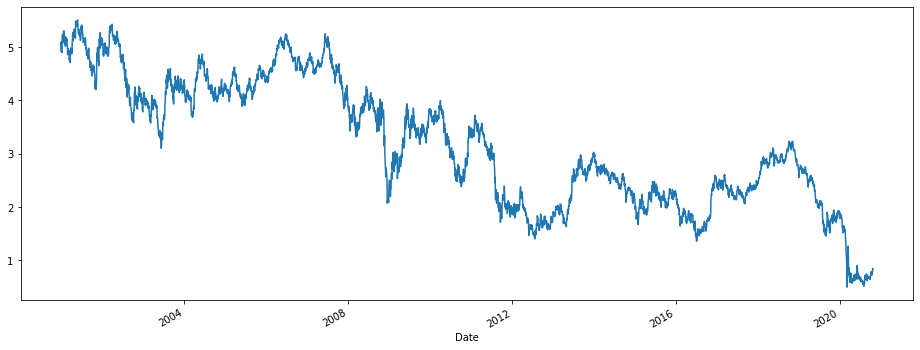

In [98]:
working_data["^TNX Adj Close"].plot(figsize = (16,6))

### Preparing the data for model
- Separating X - > Features and y - > Target (TNX)

In [99]:
X = working_data.drop("^TNX Adj Close", axis= 1).values
y = working_data["^TNX Adj Close"].values

### Training testing and splitting

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Scaling the data to a normal Distribution

In [102]:
from sklearn.preprocessing import MinMaxScaler

In [103]:
scalar = MinMaxScaler()

In [104]:
X_train = scalar.fit_transform(X_train)

In [105]:
X_test = scalar.transform(X_test)

### Early Stopping Callback
- Will use early stopping to prevent overtraining on the training data 

In [106]:
from tensorflow.keras.callbacks import EarlyStopping

In [107]:
stop = EarlyStopping("val_loss", mode="min", patience= 20)

## Creating the model

In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense

In [109]:
model = Sequential()
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1))
model.compile(activation = 'adam', loss = "mse")

In [110]:
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=200, callbacks=[stop])

Train on 3463 samples, validate on 1485 samples
Epoch 1/200
3463/3463 [==============================] - 3s 731us/sample - loss: 10.3763 - val_loss: 9.4739
Epoch 2/200
3463/3463 [==============================] - 0s 132us/sample - loss: 7.4419 - val_loss: 5.6727
Epoch 3/200
3463/3463 [==============================] - 0s 132us/sample - loss: 3.5779 - val_loss: 2.2855
Epoch 4/200
3463/3463 [==============================] - 0s 132us/sample - loss: 1.8390 - val_loss: 1.6866
Epoch 5/200
3463/3463 [==============================] - 1s 146us/sample - loss: 1.4604 - val_loss: 1.3402
Epoch 6/200
3463/3463 [==============================] - 0s 141us/sample - loss: 1.1901 - val_loss: 1.0989
Epoch 7/200
3463/3463 [==============================] - 0s 132us/sample - loss: 0.9984 - val_loss: 0.9249
Epoch 8/200
3463/3463 [==============================] - 0s 132us/sample - loss: 0.8756 - val_loss: 0.8307
Epoch 9/200
3463/3463 [==============================] - 0s 132us/sample - loss: 0.8011 - val_l

3463/3463 [==============================] - 0s 131us/sample - loss: 0.3331 - val_loss: 0.3001
Epoch 77/200
3463/3463 [==============================] - 0s 130us/sample - loss: 0.3279 - val_loss: 0.3065
Epoch 78/200
3463/3463 [==============================] - 0s 130us/sample - loss: 0.3256 - val_loss: 0.2957
Epoch 79/200
3463/3463 [==============================] - 0s 131us/sample - loss: 0.3229 - val_loss: 0.3002
Epoch 80/200
3463/3463 [==============================] - 0s 132us/sample - loss: 0.3218 - val_loss: 0.2875
Epoch 81/200
3463/3463 [==============================] - 0s 136us/sample - loss: 0.3180 - val_loss: 0.2855
Epoch 82/200
3463/3463 [==============================] - 0s 137us/sample - loss: 0.3158 - val_loss: 0.2993
Epoch 83/200
3463/3463 [==============================] - 0s 136us/sample - loss: 0.3155 - val_loss: 0.2838
Epoch 84/200
3463/3463 [==============================] - 0s 136us/sample - loss: 0.3139 - val_loss: 0.2922
Epoch 85/200
3463/3463 [=================

3463/3463 [==============================] - 0s 131us/sample - loss: 0.2510 - val_loss: 0.2307
Epoch 152/200
3463/3463 [==============================] - 0s 131us/sample - loss: 0.2519 - val_loss: 0.2280
Epoch 153/200
3463/3463 [==============================] - 0s 131us/sample - loss: 0.2503 - val_loss: 0.2810
Epoch 154/200
3463/3463 [==============================] - 0s 131us/sample - loss: 0.2514 - val_loss: 0.2307
Epoch 155/200
3463/3463 [==============================] - 0s 131us/sample - loss: 0.2497 - val_loss: 0.2292
Epoch 156/200
3463/3463 [==============================] - 0s 130us/sample - loss: 0.2503 - val_loss: 0.2259
Epoch 157/200
3463/3463 [==============================] - 0s 131us/sample - loss: 0.2488 - val_loss: 0.2266
Epoch 158/200
3463/3463 [==============================] - 0s 130us/sample - loss: 0.2478 - val_loss: 0.2426
Epoch 159/200
3463/3463 [==============================] - 0s 131us/sample - loss: 0.2479 - val_loss: 0.2357
Epoch 160/200
3463/3463 [========

## Plot below shows that the model preformed really well 
- There is also a good about of room to keep training since we made it to all 300 epochs

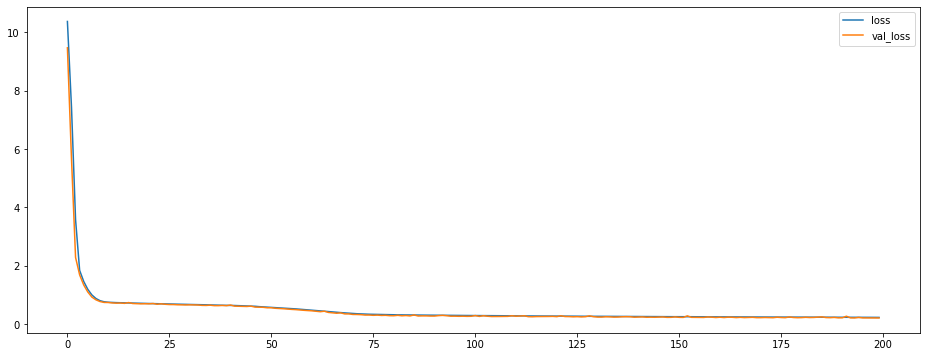

In [111]:
pd.DataFrame(model.history.history).plot(figsize = (16,6))

### Predictions 
- will use the model to make preditions on the Test data

In [112]:
predictions = model.predict(X_test)

### Metrics
- Will use sklearn metrics to test the prediction accuracy for the data

In [113]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [114]:
print(explained_variance_score(y_test, predictions))

0.8553957956986719


In [115]:
print(mean_absolute_error(y_test, predictions))

0.3676470028832304


In [116]:
print(mean_squared_error(y_test, predictions))

0.20853902969437155


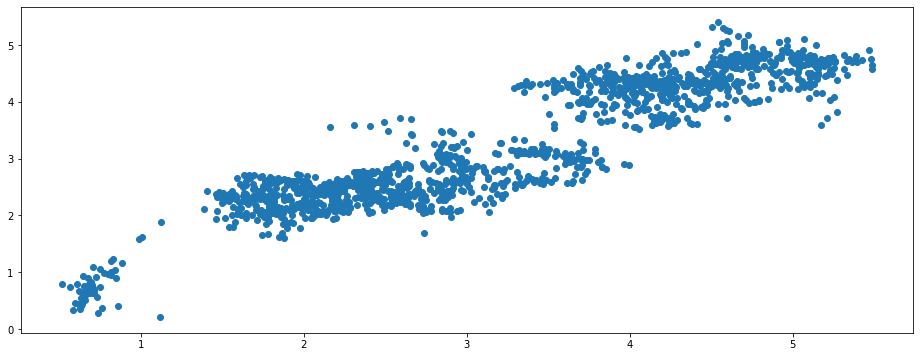

In [117]:
plt.figure(figsize=(16,6))
plt.scatter(y_test, predictions)

### Testing in random Data 

In [118]:
from random import randint
random_index = randint(1, len(working_data))
random_day = working_data.drop("^TNX Adj Close", axis=1).iloc[random_index]

In [119]:
random_day

^GSPC     1142.310059
^DJI     10809.169922
^IXIC     2373.129883
^RUT       669.739990
Name: 2010-09-28 00:00:00, dtype: float64

In [120]:
random_day = scalar.transform(random_day.values.reshape(1,4))

In [121]:
model.predict(random_day)

array([[2.6834779]], dtype=float32)

In [122]:
working_data.iloc[random_index]

^GSPC              1142.310059
^DJI              10809.169922
^IXIC              2373.129883
^RUT                669.739990
^TNX Adj Close        2.456000
Name: 2010-09-28 00:00:00, dtype: float64

### Checking Today's Date

In [123]:
toadys_index = working_data.index.argmax()

In [124]:
working_data.iloc[toadys_index]

^GSPC              3464.899902
^DJI              28409.650391
^IXIC             11536.009766
^RUT               1634.060059
^TNX Adj Close        0.841000
Name: 2020-10-23 00:00:00, dtype: float64

In [125]:
X_train.shape

(3463, 4)

In [126]:
working_data.iloc[toadys_index].values

array([3.46489990e+03, 2.84096504e+04, 1.15360098e+04, 1.63406006e+03,
       8.41000021e-01])

##### we will need to reshape and scale the data since this is what the model was trained on

In [127]:
todays_date_data = scalar.transform(working_data.drop("^TNX Adj Close", axis = 1).iloc[toadys_index].values.reshape(1,4))

## Model Prediction on the 10year
- Model predicition for the most recent date in the data set
- WE can see that the model is not too far off but could make some improvments
- Below we wull add a 20 day moving average for the Capital markets as well as the upper and loer bounds of a bollinger band

In [128]:
model.predict(todays_date_data)

array([[1.0398058]], dtype=float32)

## Feature Generation
- 20 day Rolling mean and Bollinger Band 

In [129]:
working_data.rolling(20).mean()

,^GSPC,^DJI,^IXIC,^RUT,^TNX Adj Close
Date,,,,,
2001-01-02,NaN,NaN,NaN,NaN,NaN
2001-01-03,NaN,NaN,NaN,NaN,NaN
2001-01-04,NaN,NaN,NaN,NaN,NaN
2001-01-05,NaN,NaN,NaN,NaN,NaN
2001-01-08,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-10-19,3391.051489,27922.271582,11275.374463,1559.740985,0.71445
2020-10-20,3398.741980,27960.328516,11321.458984,1564.073480,0.72075
2020-10-21,3405.949976,28015.344531,11354.313477,1570.687976,0.72835


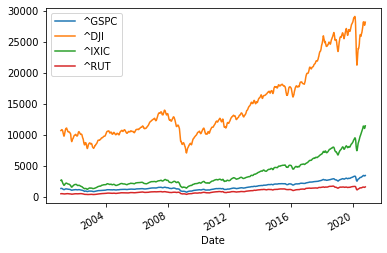

In [130]:
working_data.rolling(20).mean().drop("^TNX Adj Close", axis = 1).plot()

### Adding the 15 day, 20 day moving average to the data set

In [131]:
for t in list(working_data.columns):
    working_data[f"{t} 20day MA"] = working_data[f"{t}"].rolling(20).mean()

In [132]:
for x in ['^GSPC', '^DJI', '^IXIC', '^RUT']:
    working_data[f"{x} 15day  MA"] = working_data[f"{x}"].rolling(15).mean()

In [133]:
working_data

,^GSPC,^DJI,^IXIC,^RUT,^TNX Adj Close,^GSPC 20day MA,^DJI 20day MA,^IXIC 20day MA,^RUT 20day MA,^TNX Adj Close 20day MA,^GSPC 15day MA,^DJI 15day MA,^IXIC 15day MA,^RUT 15day MA
Date,,,,,,,,,,,,,,
2001-01-02,1320.280029,10790.919922,2474.159912,483.549988,4.917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-03,1283.270020,10637.419922,2254.560059,462.489990,5.097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-04,1347.560059,10944.940430,2593.959961,484.390015,5.013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-05,1333.339966,10912.809570,2573.110107,477.200012,4.948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-08,1298.349976,10658.730469,2388.719971,463.140015,4.897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-19,3493.659912,28633.550781,11732.339844,1636.839966,0.761,3391.051489,27922.271582,11275.374463,1559.740985,0.71445,3430.453320,28197.745443,11456.116667,1585.070646
2020-10-20,3439.379883,28245.849609,11531.830078,1620.569946,0.797,3398.741980,27960.328516,11321.458984,1564.073480,0.72075,3437.485319,28256.659375,11485.946680,1594.613306
2020-10-21,3439.909912,28270.660156,11530.389648,1618.339966,0.816,3405.949976,28015.344531,11354.313477,1570.687976,0.72835,3443.417985,28304.020703,11514.039323,1601.822640


##  Dropping the 10 year MA, and nill values

In [134]:
working_data.drop("^TNX Adj Close 20day MA", axis=1, inplace=True)

In [135]:
working_data.dropna(inplace=True)

In [136]:
working_data.isnull().sum()

^GSPC              0
^DJI               0
^IXIC              0
^RUT               0
^TNX Adj Close     0
^GSPC 20day MA     0
^DJI 20day MA      0
^IXIC 20day MA     0
^RUT 20day MA      0
^GSPC 15day  MA    0
^DJI 15day  MA     0
^IXIC 15day  MA    0
^RUT 15day  MA     0
dtype: int64

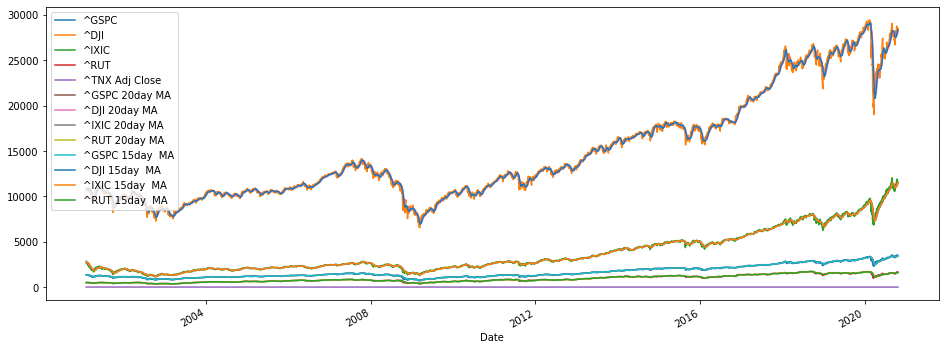

In [137]:
working_data.plot(figsize = (16,6))

## Recreating the model to see if there is any improvments

In [138]:
X = working_data.drop("^TNX Adj Close", axis=1).values
y = working_data["^TNX Adj Close"].values

## Training Spliting 

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [140]:
X_train = scalar.fit_transform(X_train)

In [141]:
X_test = scalar.transform(X_test)

## Stopping
- We will use the same early stopping callback as we used previously 

## creating the model 

In [142]:
X_train.shape

(3450, 12)

In [143]:
model = Sequential()
model.add(Dense(units = 12, activation = "relu"))
model.add(Dense(units = 12, activation = "relu"))
model.add(Dense(units = 12, activation = "relu"))
model.add(Dense(units = 12, activation = "relu"))
model.add(Dense(units = 12, activation = "relu"))
model.add(Dense(units = 12, activation = "relu"))
model.add(Dense(units = 1))
model.compile(optimizer = "adam", loss = "mse")

## fitting the model

In [144]:
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=250, callbacks=[stop])

Train on 3450 samples, validate on 1479 samples
Epoch 1/250
3450/3450 [==============================] - 2s 544us/sample - loss: 7.9514 - val_loss: 3.2605
Epoch 2/250
3450/3450 [==============================] - 0s 131us/sample - loss: 1.6421 - val_loss: 0.7599
Epoch 3/250
3450/3450 [==============================] - 0s 137us/sample - loss: 0.7041 - val_loss: 0.6497
Epoch 4/250
3450/3450 [==============================] - 0s 126us/sample - loss: 0.6280 - val_loss: 0.5599
Epoch 5/250
3450/3450 [==============================] - 0s 126us/sample - loss: 0.5148 - val_loss: 0.4728
Epoch 6/250
3450/3450 [==============================] - 0s 128us/sample - loss: 0.3756 - val_loss: 0.2960
Epoch 7/250
3450/3450 [==============================] - 0s 129us/sample - loss: 0.2635 - val_loss: 0.2075
Epoch 8/250
3450/3450 [==============================] - 0s 134us/sample - loss: 0.2135 - val_loss: 0.1706
Epoch 9/250
3450/3450 [==============================] - 0s 128us/sample - loss: 0.1889 - val_lo

3450/3450 [==============================] - 0s 128us/sample - loss: 0.0792 - val_loss: 0.0726
Epoch 77/250
3450/3450 [==============================] - 0s 128us/sample - loss: 0.0771 - val_loss: 0.0719
Epoch 78/250
3450/3450 [==============================] - 0s 126us/sample - loss: 0.0784 - val_loss: 0.0776
Epoch 79/250
3450/3450 [==============================] - 0s 127us/sample - loss: 0.0807 - val_loss: 0.0749
Epoch 80/250
3450/3450 [==============================] - 0s 127us/sample - loss: 0.0763 - val_loss: 0.0759
Epoch 81/250
3450/3450 [==============================] - 0s 127us/sample - loss: 0.0766 - val_loss: 0.0704
Epoch 82/250
3450/3450 [==============================] - 0s 126us/sample - loss: 0.0766 - val_loss: 0.0703
Epoch 83/250
3450/3450 [==============================] - 0s 126us/sample - loss: 0.0747 - val_loss: 0.0772
Epoch 84/250
3450/3450 [==============================] - 0s 127us/sample - loss: 0.0746 - val_loss: 0.0776
Epoch 85/250
3450/3450 [=================

3450/3450 [==============================] - 0s 128us/sample - loss: 0.0684 - val_loss: 0.0702
Epoch 152/250
3450/3450 [==============================] - 0s 126us/sample - loss: 0.0703 - val_loss: 0.0660
Epoch 153/250
3450/3450 [==============================] - 0s 126us/sample - loss: 0.0671 - val_loss: 0.0666
Epoch 154/250
3450/3450 [==============================] - 0s 128us/sample - loss: 0.0691 - val_loss: 0.0668
Epoch 155/250
3450/3450 [==============================] - 0s 134us/sample - loss: 0.0690 - val_loss: 0.0662
Epoch 156/250
3450/3450 [==============================] - 0s 133us/sample - loss: 0.0670 - val_loss: 0.0650
Epoch 157/250
3450/3450 [==============================] - 0s 128us/sample - loss: 0.0682 - val_loss: 0.0652
Epoch 158/250
3450/3450 [==============================] - 1s 188us/sample - loss: 0.0656 - val_loss: 0.0690
Epoch 159/250
3450/3450 [==============================] - 1s 164us/sample - loss: 0.0681 - val_loss: 0.0683
Epoch 160/250
3450/3450 [========

3450/3450 [==============================] - 0s 123us/sample - loss: 0.0659 - val_loss: 0.0671
Epoch 227/250
3450/3450 [==============================] - 0s 124us/sample - loss: 0.0684 - val_loss: 0.0642
Epoch 228/250
3450/3450 [==============================] - 0s 123us/sample - loss: 0.0646 - val_loss: 0.0704
Epoch 229/250
3450/3450 [==============================] - 0s 125us/sample - loss: 0.0642 - val_loss: 0.0590
Epoch 230/250
3450/3450 [==============================] - 0s 124us/sample - loss: 0.0675 - val_loss: 0.0646
Epoch 231/250
3450/3450 [==============================] - 0s 123us/sample - loss: 0.0627 - val_loss: 0.0829
Epoch 232/250
3450/3450 [==============================] - 0s 136us/sample - loss: 0.0643 - val_loss: 0.0594
Epoch 233/250
3450/3450 [==============================] - 1s 199us/sample - loss: 0.0689 - val_loss: 0.0611
Epoch 234/250
3450/3450 [==============================] - 0s 143us/sample - loss: 0.0661 - val_loss: 0.0667
Epoch 235/250
3450/3450 [========

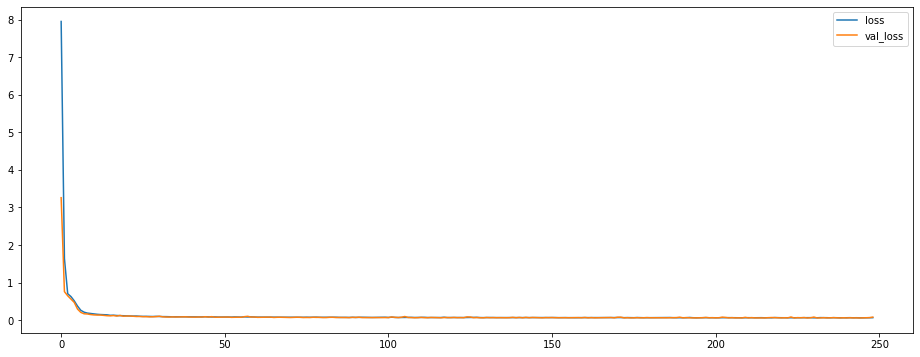

In [145]:
pd.DataFrame(model.history.history).plot(figsize = (16,6))

## Checking Metrics

In [146]:
predict = model.predict(X_test)

In [147]:
print(mean_absolute_error(y_test, predict))

0.22750452920502306


In [148]:
print(mean_squared_error(y_test, predict))

0.0818509755841951


## WE see a great improvment in the explained verience score

In [149]:
print(explained_variance_score(y_test, predict))

0.951764225979789


## Testing the Data on random dates 

In [150]:
rand_ind = randint(1, len(working_data))
random_day = working_data.drop("^TNX Adj Close", axis=1).iloc[rand_ind]

## scaling the random data 

In [151]:
random_day = scalar.transform(random_day.values.reshape(1,12))

## True value

In [152]:
working_data.iloc[rand_ind]["^TNX Adj Close"]

1.6100000143051147

## prediction

In [153]:
model.predict(random_day)

array([[2.1779013]], dtype=float32)

## Testing new model on most recent day

In [154]:
most_recent = working_data.index.argmax()

In [155]:
working_data.iloc[most_recent]

^GSPC               3464.899902
^DJI               28409.650391
^IXIC              11536.009766
^RUT                1634.060059
^TNX Adj Close         0.841000
^GSPC 20day MA      3423.807471
^DJI 20day MA      28139.213574
^IXIC 20day MA     11432.370459
^RUT 20day MA       1585.247980
^GSPC 15day  MA     3455.172640
^DJI 15day  MA     28380.807292
^IXIC 15day  MA    11559.245247
^RUT 15day  MA      1616.860645
Name: 2020-10-23 00:00:00, dtype: float64

## Getting Values

In [156]:
today = working_data.iloc[most_recent].drop("^TNX Adj Close").values

In [157]:
today = scalar.transform(today.reshape(1,12))

In [158]:
model.predict(today)

array([[0.7606135]], dtype=float32)